In [185]:
import pandas as pd
Maths_Grades =pd.read_csv("Maths.csv")


This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in two distinct subjects: Mathematics (mat) and Portuguese language (por). In [Cortez and Silva, 2008], the two datasets were modeled under binary/five-level classification and regression tasks. Important note: the target attribute G3 has a strong correlation with attributes G2 and G1. This occurs because G3 is the final year grade (issued at the 3rd period), while G1 and G2 correspond to the 1st and 2nd period grades. It is more difficult to predict G3 without G2 and G1, but such prediction is much more useful (see paper source for more details).

In [11]:
Maths_Grades.head()
#School - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
#sex	student's sex (binary: 'F' - female or 'M' - male)
# age	student's age (numeric: from 15 to 22)
#address	student's home address type (binary: 'U' - urban or 'R' - rural)
#famsize	family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
##Pstatus	parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
#mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)
#	mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
#	reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
#student's guardian (nominal: 'mother', 'father' or 'other')
#	home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
#weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
#	number of past class failures (numeric: n if 1<=n<3, else 4)


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [12]:
Maths_Grades.shape
#397 rows 33 cols
#397 students total

(397, 33)

In [14]:
Maths_Grades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      397 non-null    object
 1   sex         397 non-null    object
 2   age         397 non-null    int64 
 3   address     397 non-null    object
 4   famsize     397 non-null    object
 5   Pstatus     397 non-null    object
 6   Medu        397 non-null    int64 
 7   Fedu        397 non-null    int64 
 8   Mjob        397 non-null    object
 9   Fjob        397 non-null    object
 10  reason      397 non-null    object
 11  guardian    397 non-null    object
 12  traveltime  397 non-null    int64 
 13  studytime   397 non-null    int64 
 14  failures    397 non-null    int64 
 15  schoolsup   397 non-null    object
 16  famsup      397 non-null    object
 17  paid        397 non-null    object
 18  activities  397 non-null    object
 19  nursery     397 non-null    object
 20  higher    

In [15]:
Maths_Grades.describe()


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,16.705290,2.748111,2.521411,1.450882,2.032746,0.335013,3.944584,3.234257,3.108312,1.478589,2.289673,3.556675,5.695214,10.881612,10.687657,10.377834
std,1.279716,1.097301,1.090672,0.696840,0.838731,0.742714,0.894400,0.996476,1.112762,0.889143,1.286770,1.388967,7.988015,3.333120,3.770322,4.604928
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


checking for missing values

In [18]:
Maths_Grades.isna().sum()
#No NA values

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [83]:
Maths_Grades['school'].value_counts()
#higher number of students from GP school incomparison to Ms school
# Two schools (GP - Gabriel Pereira or 'MS - Mousinho da Silveira)


school
GP    350
MS     47
Name: count, dtype: int64

In [151]:
Maths_Grades['school'].value_counts(normalize=True)
#88% of students in this data are of GP school

school
GP    0.881612
MS    0.118388
Name: proportion, dtype: float64

<Axes: xlabel='school', ylabel='count'>

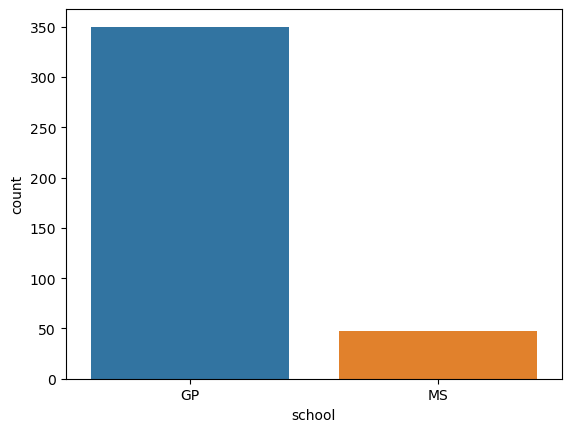

In [156]:
import seaborn as sns
sns.countplot(x='school',data=Maths_Grades)
#count of students from GP and MS school

In [186]:
df_encoded =pd.get_dummies(Maths_Grades, columns=['school'], drop_first=True)
df_encoded
#one hot encoding for school as machine doesn't understand categorical data
#converting categorical to numeric
# it will replace school catgeorical data and convert it into boolean column 

,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,school_MS
0,F,18,U,GT3,A,4,4,at_home,teacher,course,...,3,4,1,1,3,6,5,6,6,False
1,F,17,U,GT3,T,1,1,at_home,other,course,...,3,3,1,1,3,4,5,5,6,False
2,F,15,U,LE3,T,1,1,at_home,other,other,...,3,2,2,3,3,10,7,8,10,False
3,F,15,U,GT3,T,4,2,health,services,home,...,2,2,1,1,5,2,15,14,15,False
4,F,16,U,GT3,T,3,3,other,other,home,...,3,2,1,2,5,4,6,10,10,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,M,21,R,GT3,T,1,1,other,other,course,...,5,3,3,3,3,3,10,8,7,True
393,M,18,R,LE3,T,3,2,services,other,course,...,4,1,3,4,5,0,11,12,10,True
394,M,19,U,LE3,T,1,1,other,at_home,course,...,2,3,3,3,5,5,8,9,9,True
395,F,18,U,GT3,A,4,4,at_home,teacher,course,...,3,4,1,1,3,6,5,6,6,False


In [86]:
Maths_Grades['sex'].value_counts()

sex
F    209
M    188
Name: count, dtype: int64

In [87]:
Maths_Grades['sex'].value_counts(normalize=True)
#female percentage is slightly higher than males.
#not major difference between percentage of male and female

sex
F    0.526448
M    0.473552
Name: proportion, dtype: float64

<Axes: xlabel='sex', ylabel='count'>

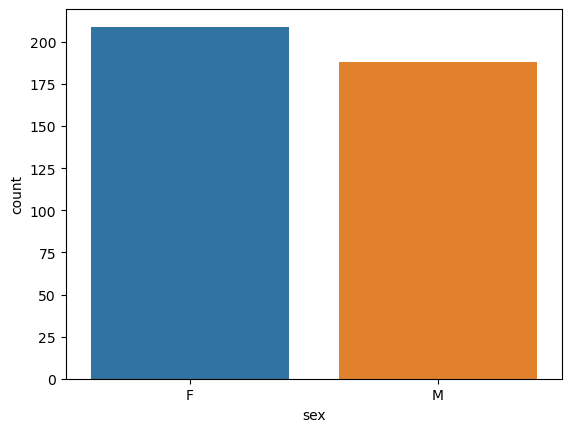

In [160]:
sns.countplot(x='sex',data=Maths_Grades)

In [187]:
df_encoded =pd.get_dummies(df_encoded, columns=['sex'], drop_first=True)
df_encoded
#Converts sex column into boolean column

,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,...,goout,Dalc,Walc,health,absences,G1,G2,G3,school_MS,sex_M
0,18,U,GT3,A,4,4,at_home,teacher,course,mother,...,4,1,1,3,6,5,6,6,False,False
1,17,U,GT3,T,1,1,at_home,other,course,father,...,3,1,1,3,4,5,5,6,False,False
2,15,U,LE3,T,1,1,at_home,other,other,mother,...,2,2,3,3,10,7,8,10,False,False
3,15,U,GT3,T,4,2,health,services,home,mother,...,2,1,1,5,2,15,14,15,False,False
4,16,U,GT3,T,3,3,other,other,home,father,...,2,1,2,5,4,6,10,10,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,21,R,GT3,T,1,1,other,other,course,other,...,3,3,3,3,3,10,8,7,True,True
393,18,R,LE3,T,3,2,services,other,course,mother,...,1,3,4,5,0,11,12,10,True,True
394,19,U,LE3,T,1,1,other,at_home,course,father,...,3,3,3,5,5,8,9,9,True,True
395,18,U,GT3,A,4,4,at_home,teacher,course,mother,...,4,1,1,3,6,5,6,6,False,False


Checking coorelation between sex and grades

In [89]:
df_encoded[['sex_M','G3']].corr()
# Males tend to have positive correlation with grades
#The correlation seems to be weak between grades and gender


,sex_M,G3
sex_M,1.000000,0.098686
G3,0.098686,1.000000


In [90]:
Maths_Grades['age'].value_counts()
#Majorty of the students are in age group of 15-19
#Very less students of age 20,21,22

age
16    104
17     98
18     83
15     82
19     25
20      3
22      1
21      1
Name: count, dtype: int64

<IPython.core.display.Javascript object>

(array([ 82.,   0., 104.,   0.,   0.,  98.,   0.,   0.,  83.,   0.,   0.,
         25.,   0.,   0.,   3.,   0.,   0.,   1.,   0.,   1.]),
 array([15.  , 15.35, 15.7 , 16.05, 16.4 , 16.75, 17.1 , 17.45, 17.8 ,
        18.15, 18.5 , 18.85, 19.2 , 19.55, 19.9 , 20.25, 20.6 , 20.95,
        21.3 , 21.65, 22.  ]),
 <BarContainer object of 20 artists>)

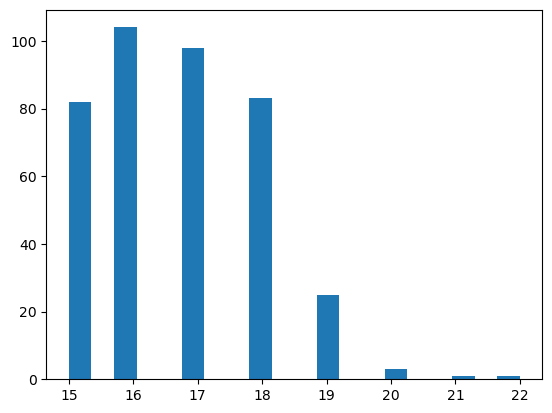

In [170]:
plt.hist(x=Maths_Grades['age'],bins=20)

<Axes: >

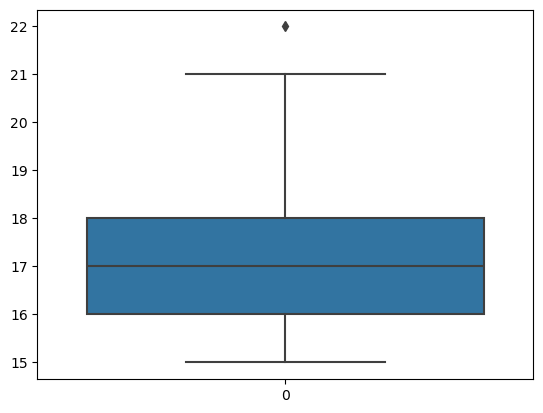

In [171]:
sns.boxplot(Maths_Grades['age'])
#min age of the students is 15 and max age is 21 and median age is 17 
# only 25% of students are less than 16
#about 50% of students are less than 17 
#about 75% of students are less than 18 age
#Outlier at age 22

Checking correlation between age and grades

In [91]:
df_encoded[['age','G3']].corr()
#As the age increases grades decreases
# correlation is -0.17 approx. between age and grades, which means they have a very weak coorelation.

,age,G3
age,1.000000,-0.172175
G3,-0.172175,1.000000


In [92]:
Maths_Grades['address'].value_counts()
#Majority of students live in urban areas incomparison to rural areas

address
U    308
R     89
Name: count, dtype: int64

In [30]:
Maths_Grades['address'].value_counts(normalize=True)

address
U    0.775819
R    0.224181
Name: proportion, dtype: float64

<Axes: xlabel='address', ylabel='count'>

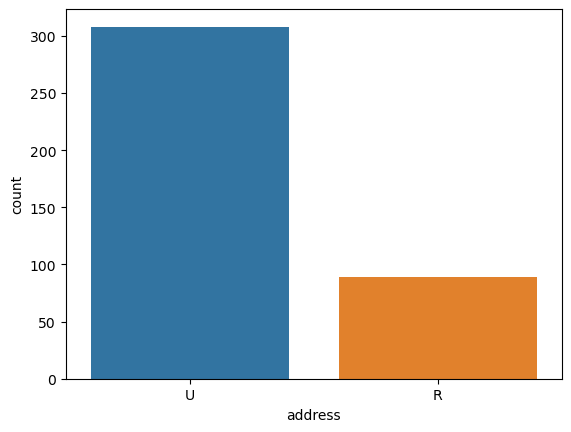

In [175]:
sns.countplot(x='address',data=Maths_Grades)

In [188]:
df_encoded =pd.get_dummies(df_encoded, columns=['address'], drop_first=True)
df_encoded
#converting address column into boolean column

,age,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,...,Dalc,Walc,health,absences,G1,G2,G3,school_MS,sex_M,address_U
0,18,GT3,A,4,4,at_home,teacher,course,mother,2,...,1,1,3,6,5,6,6,False,False,True
1,17,GT3,T,1,1,at_home,other,course,father,1,...,1,1,3,4,5,5,6,False,False,True
2,15,LE3,T,1,1,at_home,other,other,mother,1,...,2,3,3,10,7,8,10,False,False,True
3,15,GT3,T,4,2,health,services,home,mother,1,...,1,1,5,2,15,14,15,False,False,True
4,16,GT3,T,3,3,other,other,home,father,1,...,1,2,5,4,6,10,10,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,21,GT3,T,1,1,other,other,course,other,1,...,3,3,3,3,10,8,7,True,True,False
393,18,LE3,T,3,2,services,other,course,mother,3,...,3,4,5,0,11,12,10,True,True,False
394,19,LE3,T,1,1,other,at_home,course,father,1,...,3,3,5,5,8,9,9,True,True,True
395,18,GT3,A,4,4,at_home,teacher,course,mother,2,...,1,1,3,6,5,6,6,False,False,True


Checking correlation beween address and grades

In [28]:
df_encoded[['address_U','G3']].corr()
# We can see a positive correlation between students living in urban areas and grades. In other words, students living in uran areas tend to have higher grades
#Weak correlation

,address_U,G3
address_U,1.000000,0.113765
G3,0.113765,1.000000


In [33]:
Maths_Grades['famsize'].value_counts()
#most of the students hvae family size greater than 3

famsize
GT3    283
LE3    114
Name: count, dtype: int64

<Axes: xlabel='famsize', ylabel='count'>

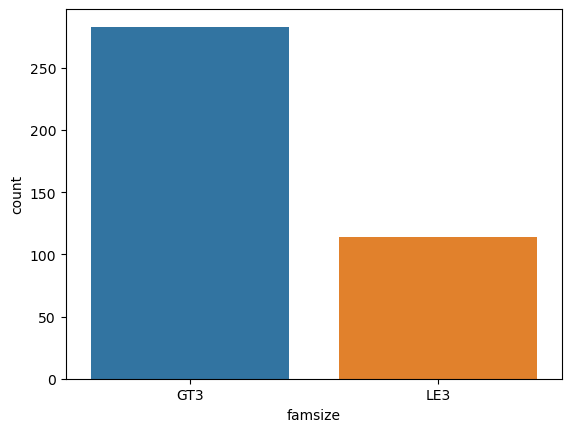

In [180]:
sns.countplot(x='famsize',data=Maths_Grades)

Comparing grades with family size

<Axes: xlabel='famsize', ylabel='G3'>

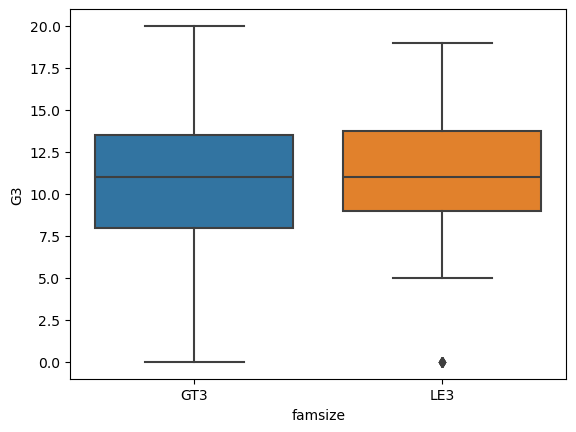

In [181]:
sns.boxplot(x='famsize',y='G3',data=Maths_Grades)
#here we can see that students with family size less than 3 have slighter higher median than the students with family size greater than 3
# Students with family size less than 3 have their grades spread from 0 to 20 where as family size less than 3 have grades ranging from 5 to 18.

In [189]:
df_encoded =pd.get_dummies(df_encoded, columns=['famsize'], drop_first=True)
#converting family size into boolean column

In [7]:
df_encoded

,age,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,...,Walc,health,absences,G1,G2,G3,school_MS,sex_M,address_U,famsize_LE3
0,18,A,4,4,at_home,teacher,course,mother,2,2,...,1,3,6,5,6,6,False,False,True,False
1,17,T,1,1,at_home,other,course,father,1,2,...,1,3,4,5,5,6,False,False,True,False
2,15,T,1,1,at_home,other,other,mother,1,2,...,3,3,10,7,8,10,False,False,True,True
3,15,T,4,2,health,services,home,mother,1,3,...,1,5,2,15,14,15,False,False,True,False
4,16,T,3,3,other,other,home,father,1,2,...,2,5,4,6,10,10,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,21,T,1,1,other,other,course,other,1,1,...,3,3,3,10,8,7,True,True,False,False
393,18,T,3,2,services,other,course,mother,3,1,...,4,5,0,11,12,10,True,True,False,True
394,19,T,1,1,other,at_home,course,father,1,1,...,3,5,5,8,9,9,True,True,True,True
395,18,A,4,4,at_home,teacher,course,mother,2,2,...,1,3,6,5,6,6,False,False,True,False


Checking correlation of family size and grades

In [29]:
df_encoded[['famsize_LE3','G3']].corr()
#There is a positive correlation between family size less than 3 and grades
#students that have family isze less than 3 tend to have higher grades
#weak correlation

,famsize_LE3,G3
famsize_LE3,1.00000,0.08586
G3,0.08586,1.00000


In [34]:
Maths_Grades['Pstatus'].value_counts()
#most of students parents are staying together rather than apart

Pstatus
T    355
A     42
Name: count, dtype: int64

In [36]:
Maths_Grades['Pstatus'].value_counts(normalize=True)

Pstatus
T    0.894207
A    0.105793
Name: proportion, dtype: float64

In [190]:
df_encoded =pd.get_dummies(df_encoded, columns=['Pstatus'], drop_first=True)
#one hot encoding for parental status; converting into boolean column

In [95]:
df_encoded[['Pstatus_T','G3']].corr()
#there is a negative correlation between parental status and grades

,Pstatus_T,G3
Pstatus_T,1.000000,-0.051873
G3,-0.051873,1.000000


In [96]:
Maths_Grades['Mjob'].value_counts()

Mjob
other       142
services    103
at_home      60
teacher      58
health       34
Name: count, dtype: int64

In [191]:
df_encoded =pd.get_dummies(df_encoded, columns=['Mjob'], drop_first=True)
#converting mothers job into boolean column


In [100]:
df_encoded

,age,address,famsize,Medu,Fedu,Fjob,reason,guardian,traveltime,studytime,...,G1,G2,G3,school_MS,sex_M,Pstatus_T,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher
0,18,U,GT3,4,4,teacher,course,mother,2,2,...,5,6,6,False,False,False,False,False,False,False
1,17,U,GT3,1,1,other,course,father,1,2,...,5,5,6,False,False,True,False,False,False,False
2,15,U,LE3,1,1,other,other,mother,1,2,...,7,8,10,False,False,True,False,False,False,False
3,15,U,GT3,4,2,services,home,mother,1,3,...,15,14,15,False,False,True,True,False,False,False
4,16,U,GT3,3,3,other,home,father,1,2,...,6,10,10,False,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,21,R,GT3,1,1,other,course,other,1,1,...,10,8,7,True,True,True,False,True,False,False
393,18,R,LE3,3,2,other,course,mother,3,1,...,11,12,10,True,True,True,False,False,True,False
394,19,U,LE3,1,1,at_home,course,father,1,1,...,8,9,9,True,True,True,False,True,False,False
395,18,U,GT3,4,4,teacher,course,mother,2,2,...,5,6,6,False,False,False,False,False,False,False


In [99]:
df_encoded[['Mjob_health','Mjob_other','Mjob_services','Mjob_teacher','G3']].corr()

,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,G3
Mjob_health,1.000000,-0.228381,-0.181147,-0.126590,0.117732
Mjob_other,-0.228381,1.000000,-0.441691,-0.308666,-0.101298
Mjob_services,-0.181147,-0.441691,1.000000,-0.244827,0.082570
Mjob_teacher,-0.126590,-0.308666,-0.244827,1.000000,0.060608
G3,0.117732,-0.101298,0.082570,0.060608,1.000000


In [40]:
Maths_Grades['Fjob'].value_counts()

Fjob
other       217
services    112
teacher      30
at_home      20
health       18
Name: count, dtype: int64

In [192]:
df_encoded =pd.get_dummies(df_encoded, columns=['Fjob'], drop_first=True)
#converting fathers job into boolean column

In [102]:
df_encoded

,age,address,famsize,Medu,Fedu,reason,guardian,traveltime,studytime,failures,...,sex_M,Pstatus_T,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher
0,18,U,GT3,4,4,course,mother,2,2,0,...,False,False,False,False,False,False,False,False,False,True
1,17,U,GT3,1,1,course,father,1,2,0,...,False,True,False,False,False,False,False,True,False,False
2,15,U,LE3,1,1,other,mother,1,2,3,...,False,True,False,False,False,False,False,True,False,False
3,15,U,GT3,4,2,home,mother,1,3,0,...,False,True,True,False,False,False,False,False,True,False
4,16,U,GT3,3,3,home,father,1,2,0,...,False,True,False,True,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,21,R,GT3,1,1,course,other,1,1,3,...,True,True,False,True,False,False,False,True,False,False
393,18,R,LE3,3,2,course,mother,3,1,0,...,True,True,False,False,True,False,False,True,False,False
394,19,U,LE3,1,1,course,father,1,1,0,...,True,True,False,True,False,False,False,False,False,False
395,18,U,GT3,4,4,course,mother,2,2,0,...,False,False,False,False,False,False,False,False,False,True


In [104]:
df_encoded[['Fjob_health','Fjob_other','Fjob_services','Fjob_teacher','G3']].corr()

,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,G3
Fjob_health,1.000000,-0.239282,-0.136617,-0.062308,0.058439
Fjob_other,-0.239282,1.000000,-0.688304,-0.313922,-0.043996
Fjob_services,-0.136617,-0.688304,1.000000,-0.179231,-0.023509
Fjob_teacher,-0.062308,-0.313922,-0.179231,1.000000,0.086338
G3,0.058439,-0.043996,-0.023509,0.086338,1.000000


In [107]:
Maths_Grades[['reason']].value_counts()


reason    
course        146
home          109
reputation    105
other          37
Name: count, dtype: int64

In [106]:
Maths_Grades[['reason','school']].value_counts()
#most of students chose GP because its courses and reputation and third factor was closer to home
#while Ms preference was beacuse of its courses and closer to home . reputation wasn't much important factor

reason      school
course      GP        125
reputation  GP        100
home        GP         98
other       GP         27
course      MS         21
home        MS         11
other       MS         10
reputation  MS          5
Name: count, dtype: int64

In [193]:
df_encoded =pd.get_dummies(df_encoded, columns=['reason'], drop_first=True)
#converting reason column to boolean column

In [109]:
Maths_Grades['traveltime'].value_counts()
# 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
#For majorty of students it takes less than 15 minutes to reach school
# For very few of them it takes greater than an hour

traveltime
1    257
2    109
3     23
4      8
Name: count, dtype: int64

In [110]:
df_encoded[['traveltime','G3']].corr()
#As the travel time increases grades decreases
#weak correlation


,traveltime,G3
traveltime,1.000000,-0.122475
G3,-0.122475,1.000000


In [45]:
Maths_Grades['studytime'].value_counts()
#1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
#Majority of stdents study for 2-5 hours
#About 106 students study less than 2 hours
#About 27 students study for significant hours : >10 hours

studytime
2    199
1    106
3     65
4     27
Name: count, dtype: int64

In [47]:
Maths_Grades['studytime'].value_counts(normalize=True)

studytime
2    0.501259
1    0.267003
3    0.163728
4    0.068010
Name: proportion, dtype: float64

correaltion between study time and grades

In [111]:
df_encoded[['studytime','G3']].corr()
#As study time increases grades also increases
#weak correlation

,studytime,G3
studytime,1.000000,0.104015
G3,0.104015,1.000000


In [112]:
Maths_Grades['failures'].value_counts()
#Majority of students never failed a class while of 16 of them failed thrice

failures
0    313
1     51
2     17
3     16
Name: count, dtype: int64

In [133]:
Maths_Grades['failures'].value_counts(normalize=True)
#78% f class have never failed
#12% of class has failed one time
# about 4% have failed twice or thrice in the class

failures
0    0.788413
1    0.128463
2    0.042821
3    0.040302
Name: proportion, dtype: float64

checking correlation between failure and grades

In [35]:
df_encoded[['failures','G3']].corr()
#as failure increases grades decreases
#weak correlation

,failures,G3
failures,1.000000,-0.361237
G3,-0.361237,1.000000


In [113]:
Maths_Grades['schoolsup'].value_counts()
#Majority of students dont go extra educational support

schoolsup
no     345
yes     52
Name: count, dtype: int64

In [136]:
Maths_Grades['schoolsup'].value_counts(normalize=True)
#13% of students takes extra educational support

schoolsup
no     0.869018
yes    0.130982
Name: proportion, dtype: float64

In [194]:
df_encoded =pd.get_dummies(df_encoded, columns=['schoolsup'], drop_first=True)
#converting catgorical into boolean column

In [115]:
df_encoded[['schoolsup_yes','G3']].corr()
#negative correlation between schoolsup and grades

,schoolsup_yes,G3
schoolsup_yes,1.000000,-0.085465
G3,-0.085465,1.000000


In [116]:
Maths_Grades['famsup'].value_counts()
#Family educational support

famsup
yes    242
no     155
Name: count, dtype: int64

In [195]:
df_encoded =pd.get_dummies(df_encoded, columns=['famsup'], drop_first=True)
##converting catgorical into boolean column

In [118]:
Maths_Grades['activities'].value_counts()
# ratio of stuents who participate in extra curricular actovities and who do not is nearly same

activities
yes    201
no     196
Name: count, dtype: int64

In [138]:
Maths_Grades['activities'].value_counts(normalize=True)
#same ratio who does the activities and who doesnt

activities
yes    0.506297
no     0.493703
Name: proportion, dtype: float64

In [196]:
df_encoded =pd.get_dummies(df_encoded, columns=['activities'], drop_first=True)
##converting catgorical into boolean column

In [121]:
df_encoded[['activities_yes','G3']].corr()
#weak correlation between activities and grades
# students who participate in extra curricular actovities they have positive effect on grades

,activities_yes,G3
activities_yes,1.000000,0.024161
G3,0.024161,1.000000


In [122]:
Maths_Grades['internet'].value_counts()
#Most of the students have access to the internet

internet
yes    329
no      68
Name: count, dtype: int64

In [140]:
Maths_Grades['internet'].value_counts(normalize=True)


internet
yes    0.828715
no     0.171285
Name: proportion, dtype: float64

In [197]:
df_encoded =pd.get_dummies(df_encoded, columns=['internet'], drop_first=True)
###converting catgorical into boolean column

In [124]:
df_encoded[['internet_yes','G3']].corr()
#weak positive correlation between grades and internet
#Students who have access to the internet, they would also have higher grades

,internet_yes,G3
internet_yes,1.000000,0.114395
G3,0.114395,1.000000


In [125]:
Maths_Grades['romantic'].value_counts()
#265 students doesn't have romantic relationship and 132 students do

romantic
no     265
yes    132
Name: count, dtype: int64

In [126]:
Maths_Grades['romantic'].value_counts(normalize=True)
#33% have romantic relationship

romantic
no     0.667506
yes    0.332494
Name: proportion, dtype: float64

In [198]:
df_encoded =pd.get_dummies(df_encoded, columns=['romantic'], drop_first=True)
#converting catgorical into boolean column

In [128]:
df_encoded[['romantic_yes','G3']].corr()
#students in romantic relationship tend to have lower grades
#weak correlation

,romantic_yes,G3
romantic_yes,1.000000,-0.123085
G3,-0.123085,1.000000


In [199]:
df_encoded =pd.get_dummies(df_encoded, columns=['guardian'], drop_first=True)
#converting catgorical into boolean column

In [200]:
df_encoded =pd.get_dummies(df_encoded, columns=['paid'], drop_first=True)
####converting catgorical into boolean column

Checking correlation between extra paid classes and grades

In [48]:
df_encoded[['paid_yes','G3']].corr()
#extra paid classes tend to increase grades
#weak correlation

,paid_yes,G3
paid_yes,1.00000,0.10844
G3,0.10844,1.00000


In [130]:
Maths_Grades['nursery'].value_counts()
#majority of students attended nursery school

nursery
yes    316
no      81
Name: count, dtype: int64

In [201]:
df_encoded =pd.get_dummies(df_encoded, columns=['nursery'], drop_first=True)
#converting catgorical into boolean column

In [133]:
df_encoded[['nursery_yes','G3']].corr()
#students that attended nursery school also had the higher grades

,nursery_yes,G3
nursery_yes,1.00000,0.04703
G3,0.04703,1.00000


In [202]:
df_encoded =pd.get_dummies(df_encoded, columns=['higher'], drop_first=True)
#converting catgorical into boolean column

In [135]:
Maths_Grades['famrel'].value_counts()

famrel
4    197
5    106
3     68
2     18
1      8
Name: count, dtype: int64

In [51]:
#quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
Maths_Grades['famrel'].value_counts(normalize=True)

famrel
4    0.496222
5    0.267003
3    0.171285
2    0.045340
1    0.020151
Name: proportion, dtype: float64

In [52]:
df_encoded[['famrel','G3']].corr()
#more the relationsip is positive grades are higher
#weak correlation 

,famrel,G3
famrel,1.000000,0.050468
G3,0.050468,1.000000


In [136]:
Maths_Grades['freetime'].value_counts()

freetime
3    159
4    115
2     64
5     40
1     19
Name: count, dtype: int64

In [145]:
#free time after school (numeric: from 1 - very low to 5 - very high)
Maths_Grades['freetime'].value_counts(normalize=True)

freetime
3    0.400504
4    0.289673
2    0.161209
5    0.100756
1    0.047859
Name: proportion, dtype: float64

In [53]:
df_encoded[['freetime','G3']].corr()
#mOre the students would have free time after school, higher their grades would be

,freetime,G3
freetime,1.000000,0.013131
G3,0.013131,1.000000


In [137]:
Maths_Grades['goout'].value_counts()

goout
3    130
2    104
4     87
5     53
1     23
Name: count, dtype: int64

In [146]:
#goout	going out with friends (numeric: from 1 - very low to 5 - very high)
Maths_Grades['goout'].value_counts(normalize=True)

goout
3    0.327456
2    0.261965
4    0.219144
5    0.133501
1    0.057935
Name: proportion, dtype: float64

In [138]:
df_encoded[['goout','G3']].corr()
#more the students  will go out lower their grades will be and vice versa

,goout,G3
goout,1.00000,-0.12776
G3,-0.12776,1.00000


In [139]:
#Dalc	workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
Maths_Grades['Dalc'].value_counts()
#most of student don't consume alcohol during workdays very few do

Dalc
1    278
2     75
3     26
5      9
4      9
Name: count, dtype: int64

In [147]:
#Dalc	workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
Maths_Grades['Dalc'].value_counts(normalize=True)

Dalc
1    0.700252
2    0.188917
3    0.065491
5    0.022670
4    0.022670
Name: proportion, dtype: float64

In [140]:
df_encoded[['Dalc','G3']].corr()
#higher the alochol consumption, lower the grades will be

,Dalc,G3
Dalc,1.000000,-0.049826
G3,-0.049826,1.000000


In [141]:
Maths_Grades['Walc'].value_counts()

Walc
1    152
2     85
3     81
4     51
5     28
Name: count, dtype: int64

In [148]:
#Walc	weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
Maths_Grades['Walc'].value_counts(normalize=True)

Walc
1    0.382872
2    0.214106
3    0.204030
4    0.128463
5    0.070529
Name: proportion, dtype: float64

In [142]:
df_encoded[['Walc','G3']].corr()
# irrespective of workday or weekedn, higher the alochol consumption, lower the grades will be

,Walc,G3
Walc,1.000000,-0.052185
G3,-0.052185,1.000000


In [143]:
Maths_Grades['health'].value_counts()

health
5    147
3     92
4     66
1     47
2     45
Name: count, dtype: int64

In [149]:
#health	current health status (numeric: from 1 - very bad to 5 - very good)
Maths_Grades['health'].value_counts(normalize=True)

health
5    0.370277
3    0.231738
4    0.166247
1    0.118388
2    0.113350
Name: proportion, dtype: float64

In [144]:
df_encoded[['health','G3']].corr()

,health,G3
health,1.000000,-0.065737
G3,-0.065737,1.000000


In [145]:
df_encoded[['absences','G3']].corr()

,absences,G3
absences,1.000000,0.037944
G3,0.037944,1.000000


In [19]:
df_encoded[['G1','G2','G3']].corr()
#only these variables are there that are correlates with target variable
#grades for first period, second period and third period are highly correlated

,G1,G2,G3
G1,1.000000,0.853474,0.802676
G2,0.853474,1.000000,0.905238
G3,0.802676,0.905238,1.000000


After feature engineering, checking the data structure
All variables are numeric now!

In [203]:
#after feature enginnering data structure
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 42 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   age                397 non-null    int64
 1   Medu               397 non-null    int64
 2   Fedu               397 non-null    int64
 3   traveltime         397 non-null    int64
 4   studytime          397 non-null    int64
 5   failures           397 non-null    int64
 6   famrel             397 non-null    int64
 7   freetime           397 non-null    int64
 8   goout              397 non-null    int64
 9   Dalc               397 non-null    int64
 10  Walc               397 non-null    int64
 11  health             397 non-null    int64
 12  absences           397 non-null    int64
 13  G1                 397 non-null    int64
 14  G2                 397 non-null    int64
 15  G3                 397 non-null    int64
 16  school_MS          397 non-null    bool 
 17  sex_M           

Splitting the data into Training and Testing

In [153]:
from sklearn.model_selection import train_test_split

Our target variable is G3 i.e grades for third period

In [204]:
#Seperating the independent and target variables
X= df_encoded.drop(columns='G3')
#includes all the data except target variable
#independent variables
Y=df_encoded['G3']
#includes only target variable

In [205]:
#splitting the data in testing and training
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=0.2,random_state=24)
#training set would get 80% of data and testing would have 20% of data
#X training has  all independent variables and y train has target varibale G3 to train the data with target variable

In [206]:
print(Xtrain.shape)
print(Xtest.shape)
print(Ytrain.shape)
print(Ytest.shape)


(317, 41)
(80, 41)
(317,)
(80,)


Scaling the numeric columns

In [207]:
num_cols = X.select_dtypes(include=['number']).columns
#selecting the names of numeric columns
bool_cols = X.select_dtypes(include=['bool']).columns
#selecting the names of boolean columns
print(num_cols)
print(bool_cols)

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2'],
      dtype='object')
Index(['school_MS', 'sex_M', 'address_U', 'famsize_LE3', 'Pstatus_T',
       'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher',
       'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher',
       'reason_home', 'reason_other', 'reason_reputation', 'schoolsup_yes',
       'famsup_yes', 'activities_yes', 'internet_yes', 'romantic_yes',
       'guardian_mother', 'guardian_other', 'paid_yes', 'nursery_yes',
       'higher_yes'],
      dtype='object')


In [ ]:
Scaling the data to bring all the values to same scale

In [208]:
scaler = StandardScaler()
#This creates a scaler object that:Subtracts the mean Divides by the standard deviation
Xtrain[num_cols] = scaler.fit_transform(Xtrain[num_cols])
Xtest[num_cols] = scaler.transform(Xtest[num_cols]) 
#fit would calculate mean and standard deviation for evry column
#transform would scales the value sof each column using those values
#each value of age minus the mean of age and standard deviation of the column
#using the same values mean and standard deviation for the columns and data present in training data

<IPython.core.display.Javascript object>

Converting the boolean values in to integer data types

In [209]:
Xtrain[bool_cols] = Xtrain[bool_cols].astype(int)
Xtest[bool_cols] = Xtest[bool_cols].astype(int)


In [210]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

During fitting this model learns weight for each independent variable and calculates the intercept to minimize the error in predicting grades G3.

In [211]:
model.fit(Xtrain, Ytrain)
print(model.coef_)
#learnt the weights for each variable

[-0.22677262  0.13218004 -0.12133567  0.02585954 -0.09718007 -0.24165247
  0.25589478  0.02962511  0.09219959 -0.03747721  0.16610514  0.06308636
  0.31457377  0.61245079  3.73508048  0.34707949  0.23018233  0.20885062
  0.04245585  0.09948467  0.10636377  0.17924655  0.16716477  0.03317647
  0.51607636  0.0356769  -0.1713355   0.28389367 -0.22576342  0.29300758
  0.27663087  0.39799082  0.17792925 -0.33999842 -0.3116119  -0.34880533
  0.31363061  0.84650274  0.02930723  0.02092703 -0.60662387]


In [212]:
print(model.intercept_)


10.535514430705161


Predicting the G3 from test data

In [213]:
y_pred = model.predict(Xtest)


In [214]:
y_pred
#G3 grades prediction from test data

array([ 7.94113472,  9.6826955 ,  8.54632972, 10.62642471,  6.04312637,
       15.40233236,  9.49533196,  8.4002298 ,  9.52245792,  4.15349662,
       12.14602297,  9.03724129, 10.47016935, 11.90553578,  3.8978811 ,
        5.79914941, 16.40064746,  4.15821338,  6.92984556, 16.65599616,
        6.04927688, 14.17274084, 16.10116022,  8.73199533, 15.68456284,
       13.00888713, 15.45263068, 12.76927199,  6.66983682,  6.77195611,
        5.2921622 ,  8.95286306,  8.17109274, 18.4905244 ,  7.11019843,
       11.08256482,  6.16974163, 11.06010976,  9.7731757 , 12.21257902,
       11.90068742, 11.51372684,  5.39694376,  8.18230508, 12.0540458 ,
       12.28545488, 11.42630628, -0.63820383,  5.03053472, 10.04061149,
       10.6098718 ,  8.15638819,  6.76240613, 12.66126334,  9.04053675,
       11.56965669, 13.90162921, 15.13798164,  6.05581123, 10.29003851,
        6.3550438 ,  8.4248325 , 14.9420902 ,  9.22400628,  8.67439696,
       13.54676765, 14.27409072, 11.73758016, 14.41870594,  5.25

Testing the performance of model using some metrics

In [216]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

rmse = mean_squared_error(Ytest, y_pred,squared=False)
#error= predicted value - original value
#error squared
#averaging the error
#how far are we off from our real value of y in test set and y in predicted
#it will tell us on average how much errors will be there on average


In [217]:

mae = mean_absolute_error(Ytest, y_pred)
#taking the absolute value of the error and averaging it.
r2 = r2_score(Ytest, y_pred)
#rsquared tells us how well the value of grades-3 is being explained by the independent variables.
print("MSE:", mse)
print("MAE:", mae)
print("R²:", r2)

MSE: 1.9883022166707733
MAE: 1.2864213618753013
R²: 0.7534912410405925


Obeservation:
On average our model's root mean squared error is 1.98.
Our mean abolsute error is 1.28. In other words, our model’s predictions are off by about 1.28 on average.
Rsquared is approximately 75%, which means that our independent variables were able to explain 75% of variation in grades3.

Prediction without using G1 and G2

In [221]:
#Seperating the independent and target variables
X1= df_encoded.drop(columns=['G3','G2','G1'])
X1
#includes all the data except target variable and grades from first and second period
#independent variables
Y=df_encoded['G3']
#includes only target variable

In [222]:
#splitting the data in testing and training
Xtrain1,Xtest1,Ytrain1,Ytest1=train_test_split(X1,Y,test_size=0.2,random_state=89)
#training set would get 80% of data and testing would have 20% of data
#X training has  all independent variables and y train has target varibale G3 to train the data with target variable

In [223]:
num_cols1 = X1.select_dtypes(include=['number']).columns
#selecting the names of numeric columns
bool_cols1 = X1.select_dtypes(include=['bool']).columns
#selecting the names of boolean columns
print(num_cols1)
print(bool_cols1)

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences'],
      dtype='object')
Index(['school_MS', 'sex_M', 'address_U', 'famsize_LE3', 'Pstatus_T',
       'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher',
       'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher',
       'reason_home', 'reason_other', 'reason_reputation', 'schoolsup_yes',
       'famsup_yes', 'activities_yes', 'internet_yes', 'romantic_yes',
       'guardian_mother', 'guardian_other', 'paid_yes', 'nursery_yes',
       'higher_yes'],
      dtype='object')


In [224]:
scaler1 = StandardScaler()
#This creates a scaler object that:Subtracts the mean Divides by the standard deviation
Xtrain1[num_cols1] = scaler1.fit_transform(Xtrain1[num_cols1])
Xtest1[num_cols1] = scaler1.transform(Xtest1[num_cols1]) 
#fit would calculate mean and standard deviation for evry column
#transform would scales the value sof each column using those values
#each value of age minus the mean of age and standard deviation of the column
#using the same values mean and standard deviation for the columns and data present in training data

<IPython.core.display.Javascript object>

In [225]:
Xtrain1[bool_cols1] = Xtrain1[bool_cols1].astype(int)
Xtest1[bool_cols1] = Xtest1[bool_cols1].astype(int)

In [226]:
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()

In [227]:
model1.fit(Xtrain1, Ytrain1)
print(model1.coef_)
#learnt the weights for each variable

[-0.56319278  0.44915753 -0.07434975 -0.07738039  0.41893676 -1.18246051
  0.25379347  0.30754138 -0.54424663 -0.15285611  0.0449364  -0.29141406
  0.46500125  1.0236747   1.14251038  0.59693391  1.19170901  0.38036839
  1.06815377 -0.2875484   0.42077243 -1.66459409  0.2921632  -0.05407236
  0.25569925  1.30780346  0.75775339  0.56176204  1.12310145 -1.74267663
 -0.23685149  0.08896591  0.84686096 -1.23802839  0.13313638  0.31864349
  0.32752987  0.2541485   0.95133212]


In [228]:
print(model1.intercept_)


6.555215302873205


In [229]:
y_pred1 = model1.predict(Xtest1)


In [230]:
y_pred1

array([ 9.1491617 ,  6.12365718, 11.46063434, 10.44780696,  2.5252556 ,
        8.28334921, 12.78181555, 10.52834704,  9.84672932, 11.62046031,
       10.23205242,  9.53042584,  7.97591403, 10.14412435,  9.95724166,
        8.18744228,  8.76550314,  9.74818578, 11.0937963 , 11.84754031,
        9.26910769, 13.32980453, 13.72061325,  3.2505719 ,  9.33749265,
       11.51934826,  8.32140751, 10.13881162,  9.51507208, 11.66903427,
        9.72138902, 10.68270849,  8.3140403 , 10.07225846,  8.94687414,
       13.67313674,  9.66313617,  7.04359953, 12.88679599, 10.90551377,
        9.81574506,  8.55300953, 11.89693472, 11.6037133 , 12.72396491,
       12.48786808, 12.22184007, 10.57278136, 12.01182538, 12.90119234,
       13.46338406, 12.08484793,  6.74394988,  9.5396691 , 11.63516056,
        7.73700501, 11.27792949,  6.84425845, 10.7260509 , 11.36686898,
       14.11601903, 13.43776635,  9.33701377, 11.34901748,  7.9322113 ,
       11.13707988, 10.16557363,  8.7144881 , 10.96240749,  8.72

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

rmse1 = mean_squared_error(Ytest1, y_pred1,squared=False)
#error= predicted value - original value
#error squared
#averaging the error
#how far are we off from our real value of y in test set and y in predicted
#it will tell us on average how much errors will be there on average

In [232]:

mae1 = mean_absolute_error(Ytest1, y_pred1)
#taking the absolute value of the error and averaging it.
r2_1 = r2_score(Ytest1, y_pred1)
#rsquared tells us how well the value of grades-3 is being explained by the independent variables.
print("rmse1:", rmse1)
print("MAE:", mae1)
print("R²:", r2_1)

rmse1: 4.315896308933698
MAE: 3.3931926547727342
R²: 0.07855745983341522


Observations:
R squared went down significantly from 75% to 7%. Looks like G1,G2 are significant predictors in predicting grades for third period. Other variables explain very less the grades for third period. In other words, other variables explain very less variability in grade 3 target variable.
Other variables have a very weak correlation with the target variable.